In [1]:
import numpy as np
import os
import glob
import allantools
import matplotlib.pyplot as plt
from tqdm import tqdm
import random 
import counts_statistics_qpe as cs
import phase_estimation_functions as qpe
from densitymatrix import DM
import shutil

SENSING 30 ATTACK

In [2]:
"""
DEFINING FOLDERS AND DIRECTORIES
"""

data_dir = [r"C:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Data\FOR PUBLICATION\Private_QPE_paper\GHZ\with_Certification",
            r"C:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Data\FOR PUBLICATION\Private_QPE_paper\Bell\with_Certification"]

os.chdir(data_dir[0])
filenames_GHZ = [i for i in glob.glob("COMPLETE_*")]

os.chdir(data_dir[1])
filenames_Bell = [i for i in glob.glob("COMPLETE_*")]

input_state = ('GHZ','Bell')
n_qubits = 4



In [32]:
"""
CALCULATING THE STATISTICS OBTAINED FROM THE XXXX MEASUREMENTS
"""
#Ordering the files : 
order = ['FIRST', 'SECOND', 'THIRD', 'FOURTH', 'FIFTH', 'SIXTH']

# Fonction pour extraire l’ordre à partir du nom
def sort_key(item):
    for index, keyword in enumerate(order):
        if keyword in item:
            return index
    return len(order)  # En cas d'élément non reconnu, le mettre à la fin

# Tri de la liste
filenames_GHZ = sorted(filenames_GHZ, key=sort_key)

files_GHZ = []
files_Bell = []
for index, file in enumerate(filenames_GHZ):
    file_dir = f"{data_dir[0]}\{file}\counts"
    os.chdir(file_dir)
    files_GHZ.append([i for i in glob.glob("Phase*.txt")])
    ### This assumes the label is of the form: "PhaseEstimation=xxxx_{index}_{theta_4}"
    files_GHZ[index].sort(key = lambda x: int((x.split("_")[1]).split(".")[0]))

for index, file in enumerate(filenames_Bell):
    file_dir = f"{data_dir[1]}\{file}\counts"
    os.chdir(file_dir)
    files_Bell.append([i for i in glob.glob("Phase*.txt")])
    ### This assumes the label is of the form: "PhaseEstimation=xxxx_{index}_{theta_4}"
    files_Bell[index].sort(key = lambda x: int((x.split("_")[1]).split(".")[0]))


New_dir = [r'C:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Data\FOR PUBLICATION\Private_QPE_paper\Attack\with_Certification\RUN_1\counts',r'C:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Data\FOR PUBLICATION\Private_QPE_paper\Attack\with_Certification\RUN_2\counts',r'C:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Data\FOR PUBLICATION\Private_QPE_paper\Attack\with_Certification\RUN_3\counts']
nu = []
List_Files = []
for w in range(len(filenames_Bell)):
    
    Files = []
    nu.append(random.choices(population = [0,1],weights = [0.9,0.1],k = len(files_Bell[0])))
    
    for i in range(len(nu[0])):

        if nu[w][i] == 0:

            file_dir = f"{data_dir[0]}\{filenames_GHZ[w]}\counts"
            os.chdir(file_dir)
            Files.append(files_GHZ[w][i])
            shutil.copy(f"{data_dir[0]}\{filenames_GHZ[w]}\counts\{files_GHZ[w][i]}",New_dir[w])

        if nu[w][i] == 1:
            file_dir = f"{data_dir[1]}\{filenames_Bell[w]}\counts"
            os.chdir(file_dir)
            Files.append(files_Bell[w][i])
            shutil.copy(f"{data_dir[1]}\{filenames_Bell[w]}\counts\{files_Bell[w][i]}",New_dir[w])
    
    List_Files.append(Files)

<string>:20: SyntaxWarning: invalid escape sequence '\{'
<string>:27: SyntaxWarning: invalid escape sequence '\{'
<string>:46: SyntaxWarning: invalid escape sequence '\{'
<string>:49: SyntaxWarning: invalid escape sequence '\{'
<string>:49: SyntaxWarning: invalid escape sequence '\{'
<string>:52: SyntaxWarning: invalid escape sequence '\{'
<string>:55: SyntaxWarning: invalid escape sequence '\{'
<string>:55: SyntaxWarning: invalid escape sequence '\{'
<>:20: SyntaxWarning: invalid escape sequence '\{'
<>:20: SyntaxWarning: invalid escape sequence '\c'
<>:27: SyntaxWarning: invalid escape sequence '\{'
<>:27: SyntaxWarning: invalid escape sequence '\c'
<>:46: SyntaxWarning: invalid escape sequence '\{'
<>:46: SyntaxWarning: invalid escape sequence '\c'
<>:49: SyntaxWarning: invalid escape sequence '\{'
<>:49: SyntaxWarning: invalid escape sequence '\{'
<>:49: SyntaxWarning: invalid escape sequence '\c'
<>:52: SyntaxWarning: invalid escape sequence '\{'
<>:52: SyntaxWarning: invalid esca

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\QILIP6\\Desktop\\Multipartite Entanglement Experiment\\Data\\FOR PUBLICATION\\Private_QPE_paper\\Attack\\with_Certification\\RUN_1\\counts'

In [19]:
stabilizers = ["xxxx"]
stab_sign = [1]
STABILIZER_TO_INDEX = {stab: i for i, stab in enumerate(stabilizers)}

n_rounds =30
samples_evolution = np.arange(1, n_rounds+1, 1)
stats_list = []

p_pass = np.zeros((len(filenames_Bell), n_rounds))
p_pass_error = np.zeros((len(filenames_Bell), n_rounds))

for index, file in enumerate(filenames_Bell):
    stats = cs.Operartors_Statistics(n_qubits, stabilizers, stab_sign, STABILIZER_TO_INDEX, List_Files[index], New_dir[index])#, qubit='1',state='Bell',set_loops=1) #Set_loops = 1?
    stats_list.append(stats)

    p_pass_list, n_samples_list = stats.get_pass_prob_evolution(samples_evolution)
    
    p_pass[index] = np.array(p_pass_list, dtype = float)
    p_pass_error[index] = np.array(stats.p_pass_error_list, dtype = float)

p_fail = 1 - p_pass
p_fail_error = p_pass_error

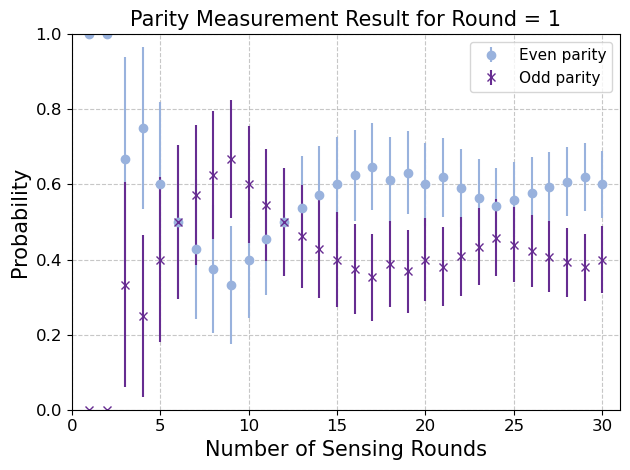

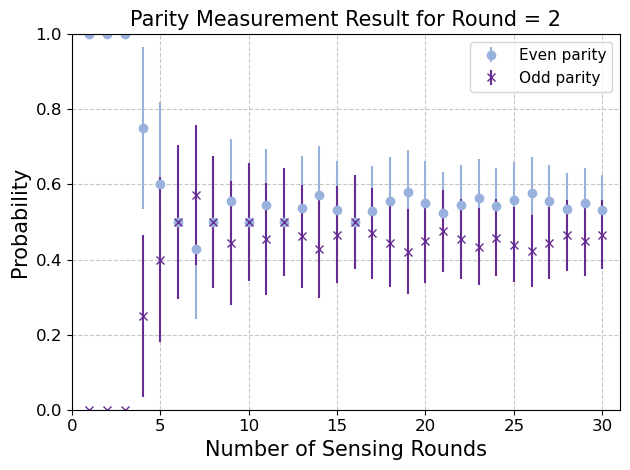

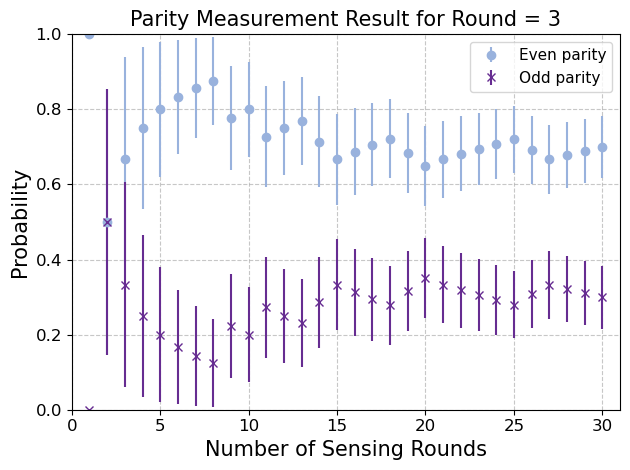

In [20]:
colors = ["#99B2DD","#662C91","#40376E","#E0BE36"]
for index, file in enumerate(filenames_Bell):
    plt.errorbar(samples_evolution, p_pass[index], p_pass_error[index], color=colors[0], fmt='o', label = "Even parity")
    plt.errorbar(samples_evolution, p_fail[index], p_fail_error[index], color=colors[1], fmt='x', label = "Odd parity")
    plt.xlabel("Number of Sensing Rounds", fontsize=15)
    plt.ylabel("Probability", fontsize=15)
    plt.title(f"Parity Measurement Result for Round = {index+1}", fontsize=15)
    plt.ylim(0,1)
    plt.xlim(0,31)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(fontsize=11, markerscale=1.)
    plt.tight_layout()
    # plt.savefig(rf"C:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Data\FOR PUBLICATION\Private_QPE_paper\Plus\with_Certification\Parity_Measurement_Graph\short_sensing_p_evol_r={index+1}")
    plt.show()

In [21]:
"""
ESTIMATION OF THETA: WITH THE VISIBILITY AND DENSITY MATRIX METHODS
IT SAVES ALL THE RELEVANT PARAMS IN thetas_mle DICTIONARY
"""
mle = {}
thetas_mle = {
              "dm": {"sum": {"values": np.zeros(3), "variance": np.zeros(3), "fisher_info": np.zeros(3)},
                    "indiv": {"values": np.zeros((4,3)), "variance": np.zeros((4,3)), "fisher_info": np.zeros((4,3))}}}

#### Function to write params in the dictionary
def set_estimation_params(estimator_class, dic, index, a_vectors_list):
    mle = estimator_class
    lim = None
    estimation_results = mle.get_theta(get_cov = True,set_lim=lim).x

    dic["sum"]["values"][index] = np.array(np.sum(estimation_results))
    dic["sum"]["variance"][index] = np.array(mle.get_variance(np.array([1, 1, 1, 1])))
    dic["sum"]["fisher_info"][index] = np.array(mle.fisher_bound/n_rounds)
    for i in range(4):
        dic["indiv"]["values"][i][index] = (estimation_results[i])
        dic["indiv"]["variance"][i][index] = np.array(mle.get_variance(a_vectors_list[i]))
        dic["indiv"]["fisher_info"][i][index] = np.array(mle.fisher_bound/n_rounds)
    return dic

### Vector list to extract the estimation of the indifivual params
a_vectors_list = [np.array([1, 0, 0, 0]), np.array([0, 1, 0, 0]), np.array([0, 0, 1, 0]), np.array([0, 0, 0, 1])]

dm_files = [i for i in glob.glob(r"C:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Data\FOR PUBLICATION\Private_QPE_paper\GHZ\QST\with_Certification\Run*")]
dm_folder = [i for i in glob.glob(r"C:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Data\FOR PUBLICATION\Private_QPE_paper\Bell\QST\with_Certification\Run*")]


density_matrix_GHZ = {}
density_matrix_Bell= {}

QST_file_GHZ = []
QST_file_Bell = []

for index, file in enumerate(filenames_Bell):
    os.chdir(dm_files[index])
    QST_file_GHZ.append(glob.glob("QST_*")[0])
    os.chdir(f'{dm_files[index]}\\{QST_file_GHZ[index]}')
    with open('density.npy','rb') as f:
        density_matrix_GHZ[f'{QST_file_GHZ[index]}'] = np.load(f)

for index, file in enumerate(dm_folder):
    os.chdir(file)
    QST_file_Bell.append(glob.glob("QST_*")[0])

for index, file in enumerate(dm_folder):
    os.chdir(f'{file}\\{QST_file_Bell[index]}')
    with open('density_TOP.npy','rb') as f:
        density_matrix_top = np.load(f)
    with open('density_BOTTOM.npy','rb') as g:
        density_matrix_bot = np.load(g)
    
    density_matrix_Bell[str(QST_file_Bell[index])] = np.kron(density_matrix_top,density_matrix_bot)



def generate_angles_in_radians(n):

    x = []
    """
    Génère 4 angles aléatoires en radians, chacun étant compris entre 0 et π/2,
    et dont la somme est exactement égale à π/2.
    """
    for i in range(n):
        """
        Génère 4 angles aléatoires en radians, chacun étant compris entre 0 et π/2,
        et dont la somme est exactement égale à π/2.
        """
        target_sum = np.pi / 2  # Somme cible
        angles = np.sort(np.random.uniform(-np.pi/2, target_sum, 3))  # Générer 3 points de coupure aléatoires
        
        # Calculer les 4 angles en prenant les différences successives
        a1 = angles[0]
        a2 = angles[1] - angles[0]
        a3 = angles[2] - angles[1]
        a4 = target_sum - angles[2]  # Assurer que la somme soit bien égale à π/2
        x.append([a1, a2, a3, a4])
        return x

# Exemple d'exécution
fisher_info_matrix_GHZ = []
x0 = generate_angles_in_radians(20)
for index, file in enumerate(filenames_Bell):
    qubit = 4
    dm_GHZ = density_matrix_GHZ[QST_file_GHZ[index]]
    dm_Bell = density_matrix_Bell[QST_file_Bell[index]]
    meas_stats = stats_list[index]
    bnds = ((-np.pi/2,np.pi/2),(-np.pi/2,np.pi/2),(-np.pi/2,np.pi/2),(-np.pi/2,np.pi/2))
    ##### Theta estimation and saving params in dictionary #####
    mle[file] = qpe.Estimator(input_state, qubit, meas_stats, x0,bnds, "attack", (dm_GHZ,dm_Bell,nu[index]))
    set_estimation_params(mle[file], thetas_mle["dm"], index, a_vectors_list)
    fisher_info_matrix_GHZ.append(mle[file].get_cov_matrix())
# print(np.transpose(thetas_mle["v"]["sum"]["values"])*180/np.pi)
# print(np.transpose(thetas_mle["dm"]["sum"]["values"])*180/np.pi)

c:\Users\QILIP6\anaconda3\Lib\site-packages\scipy\optimize\_slsqp_py.py:437: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  fx = wrapped_fun(x)


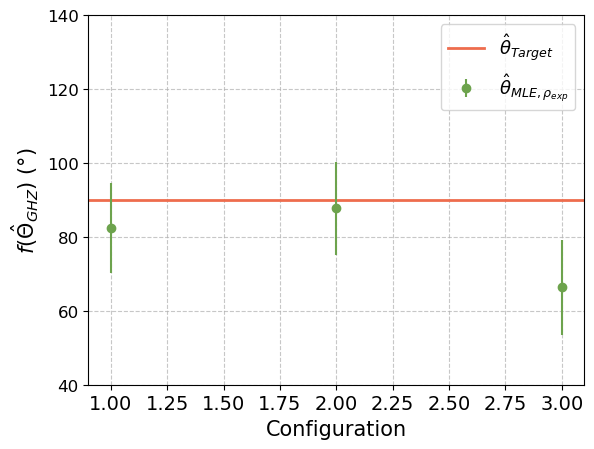

In [22]:
colors = ["#EE6C4D", "#5603AD", "#6DA34D", "#81171B", "#F19C79", "#2274A5"]
x_data = [1, 2, 3]

plt.figure(figsize=(6.4, 4.8))
plt.axhline(np.pi/2*180/np.pi, color=colors[0], linestyle='-', label=r"$\hat{\theta}_{Target}$", linewidth=2)
plt.errorbar(x_data, thetas_mle["dm"]["sum"]["values"]*180/np.pi, thetas_mle["dm"]["sum"]["variance"]*180/np.pi, color=colors[2], label = r"$\hat{\theta}_{MLE, \rho_{exp}}$", marker = 'o', linestyle = "")

plt.xlabel("Configuration", fontsize=15)
plt.ylabel(r"$f(\hat{\Theta}_{GHZ})$ (°)", fontsize=15)
plt.yticks(fontsize=12)
plt.xticks(fontsize=14)
plt.ylim(40, 140)
plt.legend(fontsize=13, markerscale=1.)#, loc='upper left')#, bbox_to_anchor=(1, 1))
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig(rf"C:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Data\FOR PUBLICATION\\Private_QPE_paper\GHZ\GHZ_Short_sensing_MLEs.pdf")
plt.show()

In [62]:
thetas_mle["dm"]["sum"]["fisher_info"]

array([3.29291758, 3.20009062, 3.3152563 ])

SENSING 30 Plus

In [27]:
"""
DEFINING FOLDERS AND DIRECTORIES
"""

data_dir = [r"C:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Data\FOR PUBLICATION\Private_QPE_paper\GHZ\with_Certification",
            r"C:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Data\FOR PUBLICATION\Private_QPE_paper\Plus\with_Certification"]

os.chdir(data_dir[0])
filenames_GHZ = [i for i in glob.glob("COMPLETE_*")]

os.chdir(data_dir[1])
filenames_Plus = [i for i in glob.glob("QPE*")]

input_state = ('GHZ','Plus')
n_qubits = 4


In [40]:
"""
CALCULATING THE STATISTICS OBTAINED FROM THE XXXX MEASUREMENTS
"""
#Ordering the files : 
order = ['FIRST', 'SECOND', 'THIRD', 'FOURTH', 'FIFTH', 'SIXTH']

# Fonction pour extraire l’ordre à partir du nom
def sort_key(item):
    for index, keyword in enumerate(order):
        if keyword in item:
            return index
    return len(order)  # En cas d'élément non reconnu, le mettre à la fin

# Tri de la liste
filenames_GHZ = sorted(filenames_GHZ, key=sort_key)

files_GHZ = []
files_Plus = []
for index, file in enumerate(filenames_GHZ):
    file_dir = f"{data_dir[0]}\{file}\counts"
    os.chdir(file_dir)
    files_GHZ.append([i for i in glob.glob("Phase*.txt")])
    ### This assumes the label is of the form: "PhaseEstimation=xxxx_{index}_{theta_4}"
    files_GHZ[index].sort(key = lambda x: int((x.split("_")[1]).split(".")[0]))

for index, file in enumerate(filenames_Plus):
    file_dir = f"{data_dir[1]}\{file}\counts"
    os.chdir(file_dir)
    files_Plus.append([i for i in glob.glob("Phase*.txt")])
    ### This assumes the label is of the form: "PhaseEstimation=xxxx_{index}_{theta_4}"
    files_Plus[index].sort(key = lambda x: int((x.split("_")[1]).split(".")[0]))


New_dir = [r'C:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Data\FOR PUBLICATION\Private_QPE_paper\Attack\with_Certification\Plus\RUN_1\counts',r'C:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Data\FOR PUBLICATION\Private_QPE_paper\Attack\with_Certification\Plus\RUN_2\counts',r'C:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Data\FOR PUBLICATION\Private_QPE_paper\Attack\with_Certification\Plus\RUN_3\counts']
nu = []
List_Files = []
for w in range(len(filenames_Plus)):
    
    Files = []
    nu.append(random.choices(population = [0,1],weights = [0.8,0.2],k = len(files_Bell[0])))
    
    for i in range(len(nu[0])):

        if nu[w][i] == 0:

            file_dir = f"{data_dir[0]}\{filenames_GHZ[w]}\counts"
            os.chdir(file_dir)
            Files.append(files_GHZ[w][i])
            shutil.copy(f"{data_dir[0]}\{filenames_GHZ[w]}\counts\{files_GHZ[w][i]}",New_dir[w])

        if nu[w][i] == 1:
            file_dir = f"{data_dir[1]}\{filenames_Plus[w]}\counts"
            os.chdir(file_dir)
            Files.append(files_Plus[w][i])
            shutil.copy(f"{data_dir[1]}\{filenames_Plus[w]}\counts\{files_Plus[w][i]}",New_dir[w])
    
    List_Files.append(Files)

<string>:20: SyntaxWarning: invalid escape sequence '\{'
<string>:27: SyntaxWarning: invalid escape sequence '\{'
<string>:46: SyntaxWarning: invalid escape sequence '\{'
<string>:49: SyntaxWarning: invalid escape sequence '\{'
<string>:49: SyntaxWarning: invalid escape sequence '\{'
<string>:52: SyntaxWarning: invalid escape sequence '\{'
<string>:55: SyntaxWarning: invalid escape sequence '\{'
<string>:55: SyntaxWarning: invalid escape sequence '\{'
<>:20: SyntaxWarning: invalid escape sequence '\{'
<>:20: SyntaxWarning: invalid escape sequence '\c'
<>:27: SyntaxWarning: invalid escape sequence '\{'
<>:27: SyntaxWarning: invalid escape sequence '\c'
<>:46: SyntaxWarning: invalid escape sequence '\{'
<>:46: SyntaxWarning: invalid escape sequence '\c'
<>:49: SyntaxWarning: invalid escape sequence '\{'
<>:49: SyntaxWarning: invalid escape sequence '\{'
<>:49: SyntaxWarning: invalid escape sequence '\c'
<>:52: SyntaxWarning: invalid escape sequence '\{'
<>:52: SyntaxWarning: invalid esca

In [41]:
"""
ESTIMATION OF THETA: WITH THE VISIBILITY AND DENSITY MATRIX METHODS
IT SAVES ALL THE RELEVANT PARAMS IN thetas_mle DICTIONARY
"""
mle = {}
thetas_mle = {
              "dm": {"sum": {"values": np.zeros(3), "variance": np.zeros(3), "fisher_info": np.zeros(3)},
                    "indiv": {"values": np.zeros((4,3)), "variance": np.zeros((4,3)), "fisher_info": np.zeros((4,3))}}}

#### Function to write params in the dictionary
def set_estimation_params(estimator_class, dic, index, a_vectors_list):
    mle = estimator_class
    lim = None
    estimation_results = mle.get_theta(get_cov = True,set_lim=lim).x

    dic["sum"]["values"][index] = np.array(np.sum(estimation_results))
    dic["sum"]["variance"][index] = np.array(mle.get_variance(np.array([1, 1, 1, 1])))
    dic["sum"]["fisher_info"][index] = np.array(mle.fisher_bound/n_rounds)
    for i in range(4):
        dic["indiv"]["values"][i][index] = (estimation_results[i])
        dic["indiv"]["variance"][i][index] = np.array(mle.get_variance(a_vectors_list[i]))
        dic["indiv"]["fisher_info"][i][index] = np.array(mle.fisher_bound/n_rounds)
    return dic

### Vector list to extract the estimation of the indifivual params
a_vectors_list = [np.array([1, 0, 0, 0]), np.array([0, 1, 0, 0]), np.array([0, 0, 1, 0]), np.array([0, 0, 0, 1])]

dm_files = [i for i in glob.glob(r"C:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Data\FOR PUBLICATION\Private_QPE_paper\GHZ\QST\with_Certification\Run*")]
dm_folder = [i for i in glob.glob(r"C:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Data\FOR PUBLICATION\Private_QPE_paper\Plus\QST\SHORT\Run*")]


density_matrix_GHZ = {}
density_matrix_Plus= {}

QST_file_GHZ = []
QST_file_Plus = []

for index, file in enumerate(filenames_Plus):
    os.chdir(dm_files[index])
    QST_file_GHZ.append(glob.glob("QST_*")[0])
    os.chdir(f'{dm_files[index]}\\{QST_file_GHZ[index]}')
    with open('density.npy','rb') as f:
        density_matrix_GHZ[f'{QST_file_GHZ[index]}'] = np.load(f)

for index, file in enumerate(dm_folder):
    os.chdir(file)
    QST_file_Plus.append(glob.glob("QST_*")[0])

for index, file in enumerate(dm_folder):
    os.chdir(f'{file}\\{QST_file_Plus[index]}')
    with open('density_TOP.npy','rb') as f:
        density_matrix_top = np.load(f)
    with open('density_BOTTOM.npy','rb') as g:
        density_matrix_bot = np.load(g)
    
    density_matrix_Plus[str(QST_file_Plus[index])] = np.kron(density_matrix_top,density_matrix_bot)


def generate_angles_in_radians(n):

    x = []
    """
    Génère 4 angles aléatoires en radians, chacun étant compris entre 0 et π/2,
    et dont la somme est exactement égale à π/2.
    """
    for i in range(n):
        """
        Génère 4 angles aléatoires en radians, chacun étant compris entre 0 et π/2,
        et dont la somme est exactement égale à π/2.
        """
        target_sum = np.pi / 2  # Somme cible
        angles = np.sort(np.random.uniform(-np.pi/2, target_sum, 3))  # Générer 3 points de coupure aléatoires
        
        # Calculer les 4 angles en prenant les différences successives
        a1 = angles[0]
        a2 = angles[1] - angles[0]
        a3 = angles[2] - angles[1]
        a4 = target_sum - angles[2]  # Assurer que la somme soit bien égale à π/2
        x.append([a1, a2, a3, a4])
        return x

# Exemple d'exécution
fisher_info_matrix_GHZ = []
x0 = generate_angles_in_radians(20)
for index, file in enumerate(filenames_Bell):
    qubit = 4
    dm_GHZ = density_matrix_GHZ[QST_file_GHZ[index]]
    dm_Plus = density_matrix_Plus[QST_file_Plus[index]]
    meas_stats = stats_list[index]
    bnds = ((-np.pi/2,np.pi/2),(-np.pi/2,np.pi/2),(-np.pi/2,np.pi/2),(-np.pi/2,np.pi/2))
    ##### Theta estimation and saving params in dictionary #####
    mle[file] = qpe.Estimator(input_state, qubit, meas_stats, x0,bnds, "attack", (dm_GHZ,dm_Plus,nu[index]))
    set_estimation_params(mle[file], thetas_mle["dm"], index, a_vectors_list)
    fisher_info_matrix_GHZ.append(mle[file].get_cov_matrix())


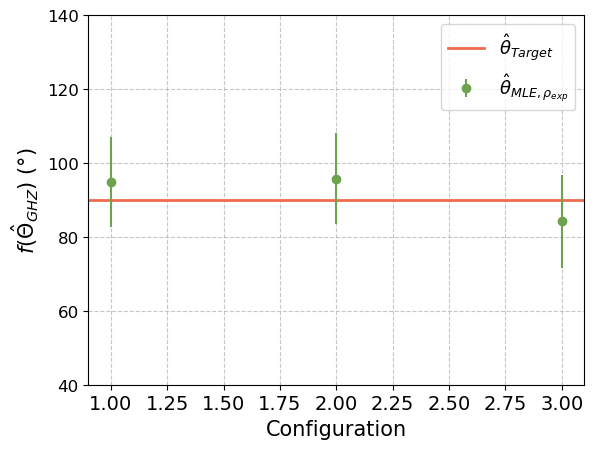

In [42]:
colors = ["#EE6C4D", "#5603AD", "#6DA34D", "#81171B", "#F19C79", "#2274A5"]
x_data = [1, 2, 3]

plt.figure(figsize=(6.4, 4.8))
plt.axhline(np.pi/2*180/np.pi, color=colors[0], linestyle='-', label=r"$\hat{\theta}_{Target}$", linewidth=2)
plt.errorbar(x_data, thetas_mle["dm"]["sum"]["values"]*180/np.pi, thetas_mle["dm"]["sum"]["variance"]*180/np.pi, color=colors[2], label = r"$\hat{\theta}_{MLE, \rho_{exp}}$", marker = 'o', linestyle = "")

plt.xlabel("Configuration", fontsize=15)
plt.ylabel(r"$f(\hat{\Theta}_{GHZ})$ (°)", fontsize=15)
plt.yticks(fontsize=12)
plt.xticks(fontsize=14)
plt.ylim(40, 140)
plt.legend(fontsize=13, markerscale=1.)#, loc='upper left')#, bbox_to_anchor=(1, 1))
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig(rf"C:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Data\FOR PUBLICATION\\Private_QPE_paper\GHZ\GHZ_Short_sensing_MLEs.pdf")
plt.show()

In [44]:
thetas_mle["dm"]["sum"]["fisher_info"]

array([2.99661035, 2.91987509, 2.789169  ])

SENSING 3000 ATTACK BELL

In [345]:
"""
DEFINING FOLDERS AND DIRECTORIES
"""

data_dir = [r"C:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Data\FOR PUBLICATION\Private_QPE_paper\GHZ\long_QPE_no_Certification",
            r"C:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Data\FOR PUBLICATION\Private_QPE_paper\Bell\long_QPE_no_Certification"]

os.chdir(data_dir[0])
filenames_GHZ = [i for i in glob.glob("COMPLETE_*")]

os.chdir(data_dir[1])
filenames_Bell = [i for i in glob.glob("COMPLETE_*")]

input_state = ('GHZ','Bell')
n_qubits = 4

In [346]:
"""
CALCULATING THE STATISTICS OBTAINED FROM THE XXXX MEASUREMENTS
"""
#Ordering the files : 
order = ['FIRST', 'SECOND', 'THIRD', 'FOURTH', 'FIFTH', 'SIXTH']

# Fonction pour extraire l’ordre à partir du nom
def sort_key(item):
    for index, keyword in enumerate(order):
        if keyword in item:
            return index
    return len(order)  # En cas d'élément non reconnu, le mettre à la fin

# Tri de la liste
filenames_GHZ = sorted(filenames_GHZ, key=sort_key)

files_GHZ = []
files_Bell = []
for index, file in enumerate(filenames_GHZ):
    file_dir = f"{data_dir[0]}\{file}\counts"
    os.chdir(file_dir)
    files_GHZ.append([i for i in glob.glob("Phase*.txt")])
    ### This assumes the label is of the form: "PhaseEstimation=xxxx_{index}_{theta_4}"
    files_GHZ[index].sort(key = lambda x: int((x.split("_")[1]).split(".")[0]))

for index, file in enumerate(filenames_Bell):
    file_dir = f"{data_dir[1]}\{file}\counts"
    os.chdir(file_dir)
    files_Bell.append([i for i in glob.glob("Phase*.txt")])
    ### This assumes the label is of the form: "PhaseEstimation=xxxx_{index}_{theta_4}"
    files_Bell[index].sort(key = lambda x: int((x.split("_")[1]).split(".")[0]))


New_dir = [r'C:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Data\FOR PUBLICATION\Private_QPE_paper\Attack\long_QPE_no_Certification\Bell\RUN_1\counts',r'C:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Data\FOR PUBLICATION\Private_QPE_paper\Attack\long_QPE_no_Certification\Bell\RUN_2\counts',r'C:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Data\FOR PUBLICATION\Private_QPE_paper\Attack\long_QPE_no_Certification\Bell\RUN_3\counts']
nu = []
List_Files = []

for index in range(len(New_dir)):
    os.chdir(New_dir[index])
    files = [i for i in glob.glob("Phase*.txt")]
    for f in files: 
        os.remove(f)

for w in range(len(filenames_Bell)):
    
    Files = []
    nu.append(random.choices(population = [0,1],weights = [0.95,0.05],k = len(files_Bell[0][:975])))
    
    for i in range(len(nu[0])):

        if nu[w][i] == 0:

            file_dir = f"{data_dir[0]}\{filenames_GHZ[w]}\counts"
            os.chdir(file_dir)
            Files.append(files_GHZ[w][i])
            shutil.copy(f"{data_dir[0]}\{filenames_GHZ[w]}\counts\{files_GHZ[w][i]}",New_dir[w])

        if nu[w][i] == 1:
            file_dir = f"{data_dir[1]}\{filenames_Bell[w]}\counts"
            os.chdir(file_dir)
            Files.append(files_Bell[w][i])
            shutil.copy(f"{data_dir[1]}\{filenames_Bell[w]}\counts\{files_Bell[w][i]}",New_dir[w])
    
    List_Files.append(Files)

<string>:20: SyntaxWarning: invalid escape sequence '\{'
<string>:27: SyntaxWarning: invalid escape sequence '\{'
<string>:53: SyntaxWarning: invalid escape sequence '\{'
<string>:56: SyntaxWarning: invalid escape sequence '\{'
<string>:56: SyntaxWarning: invalid escape sequence '\{'
<string>:59: SyntaxWarning: invalid escape sequence '\{'
<string>:62: SyntaxWarning: invalid escape sequence '\{'
<string>:62: SyntaxWarning: invalid escape sequence '\{'
<>:20: SyntaxWarning: invalid escape sequence '\{'
<>:20: SyntaxWarning: invalid escape sequence '\c'
<>:27: SyntaxWarning: invalid escape sequence '\{'
<>:27: SyntaxWarning: invalid escape sequence '\c'
<>:53: SyntaxWarning: invalid escape sequence '\{'
<>:53: SyntaxWarning: invalid escape sequence '\c'
<>:56: SyntaxWarning: invalid escape sequence '\{'
<>:56: SyntaxWarning: invalid escape sequence '\{'
<>:56: SyntaxWarning: invalid escape sequence '\c'
<>:59: SyntaxWarning: invalid escape sequence '\{'
<>:59: SyntaxWarning: invalid esca

In [347]:
stabilizers = ["xxxx"]
stab_sign = [1]
STABILIZER_TO_INDEX = {stab: i for i, stab in enumerate(stabilizers)}

n_rounds =975
samples_evolution = np.arange(1, n_rounds+1, 1)
stats_list = []

p_pass = np.zeros((len(filenames_Bell), n_rounds))
p_pass_error = np.zeros((len(filenames_Bell), n_rounds))

for index, file in enumerate(filenames_Bell):
    stats = cs.Operartors_Statistics(n_qubits, stabilizers, stab_sign, STABILIZER_TO_INDEX, List_Files[index], New_dir[index])#, qubit='1',state='Bell',set_loops=1) #Set_loops = 1?
    stats_list.append(stats)

    p_pass_list, n_samples_list = stats.get_pass_prob_evolution(samples_evolution)
    
    p_pass[index] = np.array(p_pass_list, dtype = float)
    p_pass_error[index] = np.array(stats.p_pass_error_list, dtype = float)

p_fail = 1 - p_pass
p_fail_error = p_pass_error

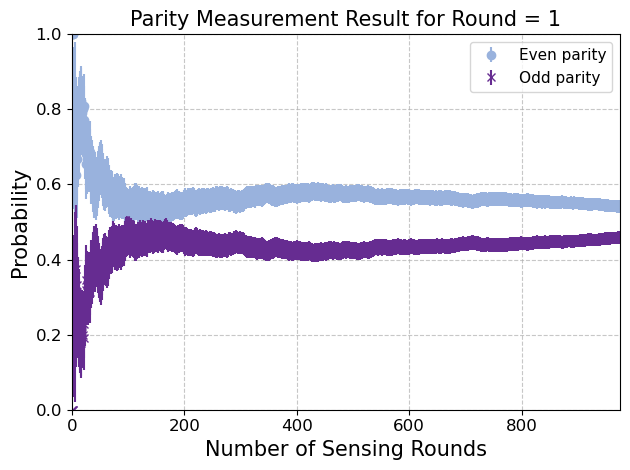

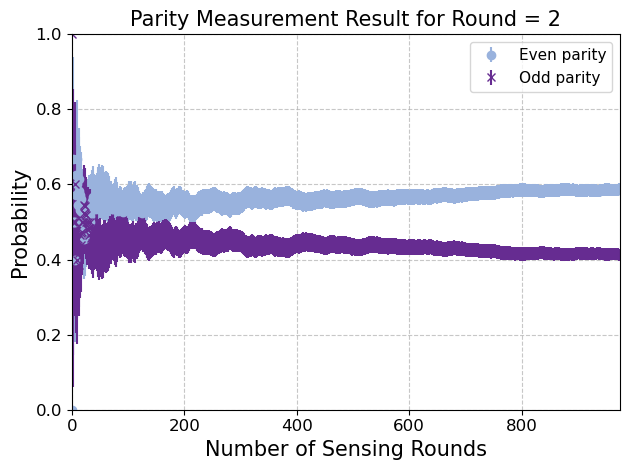

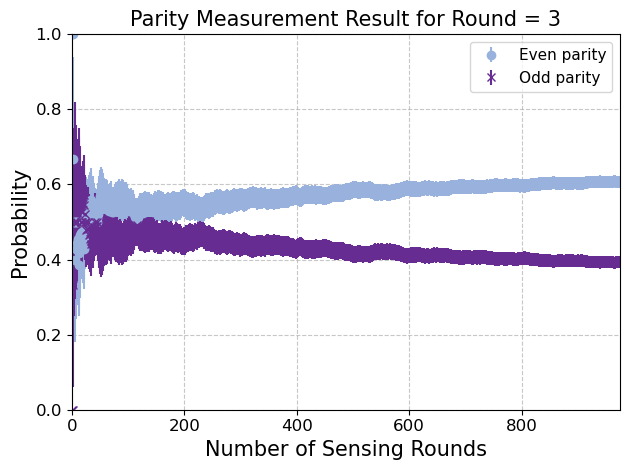

In [348]:
colors = ["#99B2DD","#662C91","#40376E","#E0BE36"]
for index, file in enumerate(filenames_Bell):
    plt.errorbar(samples_evolution, p_pass[index], p_pass_error[index], color=colors[0], fmt='o', label = "Even parity")
    plt.errorbar(samples_evolution, p_fail[index], p_fail_error[index], color=colors[1], fmt='x', label = "Odd parity")
    plt.xlabel("Number of Sensing Rounds", fontsize=15)
    plt.ylabel("Probability", fontsize=15)
    plt.title(f"Parity Measurement Result for Round = {index+1}", fontsize=15)
    plt.ylim(0,1)
    plt.xlim(0,975)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(fontsize=11, markerscale=1.)
    plt.tight_layout()
    # plt.savefig(rf"C:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Data\FOR PUBLICATION\Private_QPE_paper\Plus\with_Certification\Parity_Measurement_Graph\short_sensing_p_evol_r={index+1}")
    plt.show()

In [349]:
"""
ESTIMATION OF THETA: WITH THE VISIBILITY AND DENSITY MATRIX METHODS
IT SAVES ALL THE RELEVANT PARAMS IN thetas_mle DICTIONARY
"""
mle = {}
thetas_mle = {
              "dm": {"sum": {"values": np.zeros(3), "variance": np.zeros(3), "fisher_info": np.zeros(3)},
                    "indiv": {"values": np.zeros((4,3)), "variance": np.zeros((4,3)), "fisher_info": np.zeros((4,3))}}}

#### Function to write params in the dictionary
def set_estimation_params(estimator_class, dic, index, a_vectors_list):
    mle = estimator_class
    lim = None
    estimation_results = mle.get_theta(get_cov = True,set_lim=lim).x

    dic["sum"]["values"][index] = np.array(np.sum(estimation_results))
    dic["sum"]["variance"][index] = np.array(mle.get_variance(np.array([1, 1, 1, 1])))
    dic["sum"]["fisher_info"][index] = np.array(mle.fisher_bound/n_rounds)
    for i in range(4):
        dic["indiv"]["values"][i][index] = (estimation_results[i])
        dic["indiv"]["variance"][i][index] = np.array(mle.get_variance(a_vectors_list[i]))
        dic["indiv"]["fisher_info"][i][index] = np.array(mle.fisher_bound/n_rounds)
    return dic

### Vector list to extract the estimation of the indifivual params
a_vectors_list = [np.array([1, 0, 0, 0]), np.array([0, 1, 0, 0]), np.array([0, 0, 1, 0]), np.array([0, 0, 0, 1])]

dm_files = [i for i in glob.glob(r"C:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Data\FOR PUBLICATION\Private_QPE_paper\GHZ\QST\long_QPE_no_Certification\Run*")]
dm_folder = [i for i in glob.glob(r"C:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Data\FOR PUBLICATION\Private_QPE_paper\Bell\QST\long_QPE_no_Certification\Run*")]


density_matrix_GHZ = {}
density_matrix_Bell= {}

QST_file_GHZ = []
QST_file_Bell = []

for index, file in enumerate(filenames_Bell):
    os.chdir(dm_files[index])
    QST_file_GHZ.append(glob.glob("QST_*")[0])
    os.chdir(f'{dm_files[index]}\\{QST_file_GHZ[index]}')
    with open('density.npy','rb') as f:
        density_matrix_GHZ[f'{QST_file_GHZ[index]}'] = np.load(f)

for index, file in enumerate(dm_folder):
    os.chdir(file)
    QST_file_Bell.append(glob.glob("QST_*")[0])

for index, file in enumerate(dm_folder):
    os.chdir(f'{file}\\{QST_file_Bell[index]}')
    with open('density_TOP.npy','rb') as f:
        density_matrix_top = np.load(f)
    with open('density_BOTTOM.npy','rb') as g:
        density_matrix_bot = np.load(g)
    
    density_matrix_Bell[str(QST_file_Bell[index])] = np.kron(density_matrix_top,density_matrix_bot)



def generate_angles_in_radians(n):

    x = []
    """
    Génère 4 angles aléatoires en radians, chacun étant compris entre 0 et π/2,
    et dont la somme est exactement égale à π/2.
    """
    for i in range(n):
        """
        Génère 4 angles aléatoires en radians, chacun étant compris entre 0 et π/2,
        et dont la somme est exactement égale à π/2.
        """
        target_sum = np.pi / 2  # Somme cible
        angles = np.sort(np.random.uniform(-np.pi/2, target_sum, 3))  # Générer 3 points de coupure aléatoires
        
        # Calculer les 4 angles en prenant les différences successives
        a1 = angles[0]
        a2 = angles[1] - angles[0]
        a3 = angles[2] - angles[1]
        a4 = target_sum - angles[2]  # Assurer que la somme soit bien égale à π/2
        x.append([a1, a2, a3, a4])
    return x

# Exemple d'exécution
fisher_info_matrix_GHZ = []
x0 = generate_angles_in_radians(100)
for index, file in enumerate(filenames_Bell):
    qubit = 4
    dm_GHZ = density_matrix_GHZ[QST_file_GHZ[index]]
    dm_Bell = density_matrix_Bell[QST_file_Bell[index]]
    meas_stats = stats_list[index]
    bnds = ((-np.pi/2,np.pi/2),(-np.pi/2,np.pi/2),(-np.pi/2,np.pi/2),(-np.pi/2,np.pi/2))
    ##### Theta estimation and saving params in dictionary #####
    mle[file] = qpe.Estimator(input_state, qubit, meas_stats, x0,bnds, "attack", (dm_GHZ,dm_Bell,nu[index]))
    set_estimation_params(mle[file], thetas_mle["dm"], index, a_vectors_list)
    fisher_info_matrix_GHZ.append(mle[file].get_cov_matrix())
# print(np.transpose(thetas_mle["v"]["sum"]["values"])*180/np.pi)
# print(np.transpose(thetas_mle["dm"]["sum"]["values"])*180/np.pi)

c:\Users\QILIP6\anaconda3\Lib\site-packages\scipy\optimize\_slsqp_py.py:437: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  fx = wrapped_fun(x)
c:\Users\QILIP6\anaconda3\Lib\site-packages\scipy\optimize\_slsqp_py.py:437: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  fx = wrapped_fun(x)
c:\Users\QILIP6\anaconda3\Lib\site-packages\scipy\optimize\_slsqp_py.py:437: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  fx = wrapped_fun(x)
c:\Users\QILIP6\anaconda3\Lib\site-packages\scipy\optimize\_slsqp_py.py:441: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  g = append(wrapped_grad(x), 0.0)
c:\Users\QILIP6\anaconda3\Lib\site-packages\scipy\optimize\_slsqp_py.py:501: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  a_ieq = vstack([con['jac'](x, *con['args'])


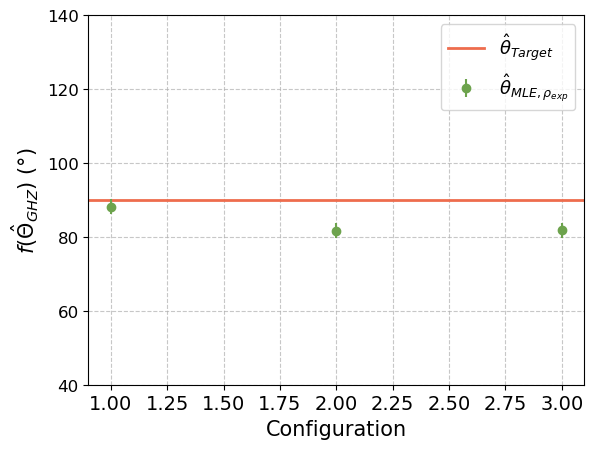

In [351]:
colors = ["#EE6C4D", "#5603AD", "#6DA34D", "#81171B", "#F19C79", "#2274A5"]
x_data = [1, 2, 3]

plt.figure(figsize=(6.4, 4.8))
plt.axhline(np.pi/2*180/np.pi, color=colors[0], linestyle='-', label=r"$\hat{\theta}_{Target}$", linewidth=2)
plt.errorbar(x_data, thetas_mle["dm"]["sum"]["values"]*180/np.pi, thetas_mle["dm"]["sum"]["variance"]*180/np.pi, color=colors[2], label = r"$\hat{\theta}_{MLE, \rho_{exp}}$", marker = 'o', linestyle = "")

plt.xlabel("Configuration", fontsize=15)
plt.ylabel(r"$f(\hat{\Theta}_{GHZ})$ (°)", fontsize=15)
plt.yticks(fontsize=12)
plt.xticks(fontsize=14)
plt.ylim(40, 140)
plt.legend(fontsize=13, markerscale=1.)#, loc='upper left')#, bbox_to_anchor=(1, 1))
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig(rf"C:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Data\FOR PUBLICATION\\Private_QPE_paper\GHZ\GHZ_Short_sensing_MLEs.pdf")
plt.show()

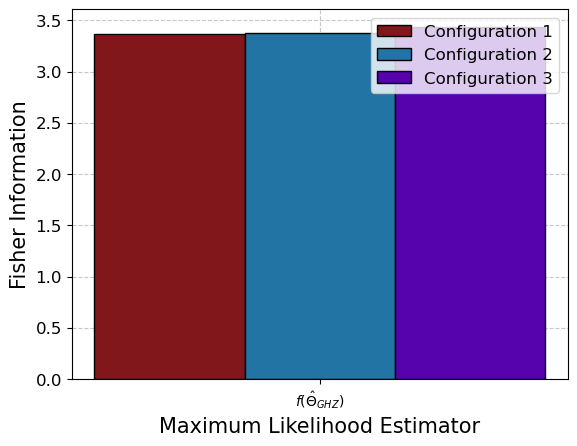

In [352]:
"""
PLOTTING THE FISHER INFORMATION FOR THE EACH OF THE a_vectors DEFINED ABOVE
"""

bar_width=0.05
data = [
    thetas_mle["dm"]["sum"]["fisher_info"],
    ]

labels = ["Configuration 1", "Configuration 2", "Configuration 3", "Configuration 4", "Configuration 5", "Configuration 6"]
colors = ["#81171B", "#2274A5", "#5603AD", "#F19C79", "#F77F00", "#6DA34D"]
fig, ax = plt.subplots(figsize=(6.4, 4.8))

      # Assuming all datasets have the same number of x-axis groups
num_groups = len(data)
x = np.arange(num_groups)
for i in range(num_groups):
    data_sets = len(data[i])
    # X-axis positions for the first dataset
    if i == 0 :
        for z in range(data_sets):
            ax.bar(x[i] + z * bar_width, data[i][z], width=bar_width, label=labels[z], color=colors[z], edgecolor='black')
            
    if i == 1 :
        for z in range(data_sets):
            ax.bar(x[i]+0.25 + z * bar_width, data[i][z], width=bar_width, color=colors[z], edgecolor='black')

    if i == 2 :
        for z in range(data_sets):
            ax.bar(x[i]+0.08 + z * bar_width, data[i][z], width=bar_width, color=colors[z], edgecolor='black')
    if i >2:
        for z in range(data_sets):
            ax.bar(x[i]+0.08 + z * bar_width, data[i][z], width=bar_width, color=colors[z], edgecolor='black')

ax.set_xticks(np.array([0.05]))
ax.set_xlabel("Maximum Likelihood Estimator", fontsize = 15)
ax.set_ylabel("Fisher Information", fontsize = 15)
# ax.set_title("Histogram with Multiple Data Sets")
ax.legend(fontsize=12)
ax.set_xticklabels([r'$f(\hat{\Theta}_{GHZ})$'], fontsize=10)
ax.tick_params(axis='y', labelsize=12)
ax.set_axisbelow(True)
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig(rf"C:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Data\FOR PUBLICATION\Private_QPE_paper\GHZ\Long_QPE_no_Certification\Fisher_Information.pdf")
plt.show()

# Example data for 6 datasets, each having values for 5 groups




In [353]:
theta_1 = thetas_mle["dm"]["indiv"]["values"][0]*180/np.pi + thetas_mle["dm"]["indiv"]["values"][1]*180/np.pi
theta_2 = thetas_mle["dm"]["indiv"]["values"][2]*180/np.pi + thetas_mle["dm"]["indiv"]["values"][3]*180/np.pi



In [357]:
theta_1

array([64.32356482, 72.5530301 , 64.20100594])

In [342]:
target_angles = {'RUN_1' : [np.pi/8,np.pi/5,np.pi/16,0.3534291735288517],
                 'RUN_2' : [np.pi/6,np.pi/4,np.pi/8,-0.13089969389957457],
                 'RUN_3' : [2*np.pi/9,np.pi/7,np.pi/8,0.03116659378]}

target_sums = {"0": [(target_angles['RUN_1'][0])*180/np.pi,
                        (target_angles['RUN_2'][0])*180/np.pi,
                        (target_angles['RUN_3'][0])*180/np.pi],
                "1": [(target_angles['RUN_1'][1])*180/np.pi,
                        (target_angles['RUN_2'][1])*180/np.pi,
                        (target_angles['RUN_3'][1])*180/np.pi],
                "2": [(target_angles['RUN_1'][2])*180/np.pi,
                        (target_angles['RUN_2'][2])*180/np.pi,
                        (target_angles['RUN_3'][2])*180/np.pi],
                "3": [(target_angles['RUN_1'][3])*180/np.pi,
                        (target_angles['RUN_2'][3])*180/np.pi,
                        (target_angles['RUN_3'][3])*180/np.pi]}




In [355]:
ratio= []
for i in range(len(theta_1)):
    ratio.append(np.abs((target_angles[f'RUN_{i+1}'][0]+target_angles[f'RUN_{i+1}'][1])-(thetas_mle["dm"]["indiv"]["values"][0][i] + thetas_mle["dm"]["indiv"]["values"][1][i]))/np.pi)
    ratio.append(np.abs((target_angles[f'RUN_{i+1}'][2]+target_angles[f'RUN_{i+1}'][3])-(thetas_mle["dm"]["indiv"]["values"][2][i] + thetas_mle["dm"]["indiv"]["values"][3][i]))/np.pi)

In [356]:
np.log10(100*np.array(ratio))

array([ 0.50991641,  0.63005208,  0.13335612,  0.5118583 , -0.07535328,
        0.57405793])

SENSING 3000 PLUS

In [215]:
"""
DEFINING FOLDERS AND DIRECTORIES
"""

data_dir = [r"C:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Data\FOR PUBLICATION\Private_QPE_paper\GHZ\long_QPE_no_Certification",
            r"C:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Data\FOR PUBLICATION\Private_QPE_paper\Plus\long_QPE_no_Certification"]

os.chdir(data_dir[0])
filenames_GHZ = [i for i in glob.glob("COMPLETE_*")]

os.chdir(data_dir[1])
filenames_Plus = [i for i in glob.glob("COMPLETE_*")]

input_state = ('GHZ','Plus')
n_qubits = 4


In [216]:
from datetime import datetime
"""
CALCULATING THE STATISTICS OBTAINED FROM THE XXXX MEASUREMENTS
"""
#Ordering the files : 
order = ['FIRST', 'SECOND', 'THIRD', 'FOURTH', 'FIFTH', 'SIXTH']

# Fonction pour extraire l’ordre à partir du nom
def sort_key(item):
    for index, keyword in enumerate(order):
        if keyword in item:
            return index
    return len(order)  # En cas d'élément non reconnu, le mettre à la fin

# Tri de la liste
filenames_GHZ = sorted(filenames_GHZ, key=sort_key)

files_GHZ = []
files_Plus = []
for index, file in enumerate(filenames_GHZ):
    file_dir = f"{data_dir[0]}\{file}\counts"
    os.chdir(file_dir)
    files_GHZ.append([i for i in glob.glob("Phase*.txt")])
    ### This assumes the label is of the form: "PhaseEstimation=xxxx_{index}_{theta_4}"
    files_GHZ[index].sort(key = lambda x: int((x.split("_")[1]).split(".")[0]))

for index, file in enumerate(filenames_Plus):
    file_dir = f"{data_dir[1]}\{file}\counts"
    os.chdir(file_dir)
    files_Plus.append([i for i in glob.glob("Phase*.txt")])
    ### This assumes the label is of the form: "PhaseEstimation=xxxx_{index}_{theta_4}"
    files_Plus[index].sort(key = lambda x: int((x.split("_")[1]).split(".")[0]))


New_dir = [r'C:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Data\FOR PUBLICATION\Private_QPE_paper\Attack\long_QPE_no_Certification\Plus\RUN_1\counts',r'C:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Data\FOR PUBLICATION\Private_QPE_paper\Attack\long_QPE_no_Certification\Plus\RUN_2\counts',r'C:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Data\FOR PUBLICATION\Private_QPE_paper\Attack\long_QPE_no_Certification\Plus\RUN_3\counts']
nu = []
List_Files = []

for index in range(len(New_dir)):
    os.chdir(New_dir[index])
    files = [i for i in glob.glob("Phase*.txt")]
    for f in files: 
        os.remove(f)

for w in range(len(filenames_Plus)):
    random.seed(datetime.now().strftime('%Y%m%d%H%M%S'))
    Files = []
    nu.append(random.choices(population = [0,1],weights = [0.95, 0.05],k = len(files_Plus[0][:975])))
    
    for i in range(len(nu[0])):

        if nu[w][i] == 0:

            file_dir = f"{data_dir[0]}\{filenames_GHZ[w]}\counts"
            os.chdir(file_dir)
            Files.append(files_GHZ[w][i])
            shutil.copy(f"{data_dir[0]}\{filenames_GHZ[w]}\counts\{files_GHZ[w][i]}",New_dir[w])

        if nu[w][i] == 1:
            file_dir = f"{data_dir[1]}\{filenames_Plus[w]}\counts"
            os.chdir(file_dir)
            Files.append(files_Plus[w][i])
            shutil.copy(f"{data_dir[1]}\{filenames_Plus[w]}\counts\{files_Plus[w][i]}",New_dir[w])
    
    List_Files.append(Files)

<string>:21: SyntaxWarning: invalid escape sequence '\{'
<string>:28: SyntaxWarning: invalid escape sequence '\{'
<string>:54: SyntaxWarning: invalid escape sequence '\{'
<string>:57: SyntaxWarning: invalid escape sequence '\{'
<string>:57: SyntaxWarning: invalid escape sequence '\{'
<string>:60: SyntaxWarning: invalid escape sequence '\{'
<string>:63: SyntaxWarning: invalid escape sequence '\{'
<string>:63: SyntaxWarning: invalid escape sequence '\{'
<>:21: SyntaxWarning: invalid escape sequence '\{'
<>:21: SyntaxWarning: invalid escape sequence '\c'
<>:28: SyntaxWarning: invalid escape sequence '\{'
<>:28: SyntaxWarning: invalid escape sequence '\c'
<>:54: SyntaxWarning: invalid escape sequence '\{'
<>:54: SyntaxWarning: invalid escape sequence '\c'
<>:57: SyntaxWarning: invalid escape sequence '\{'
<>:57: SyntaxWarning: invalid escape sequence '\{'
<>:57: SyntaxWarning: invalid escape sequence '\c'
<>:60: SyntaxWarning: invalid escape sequence '\{'
<>:60: SyntaxWarning: invalid esca

In [217]:
stabilizers = ["xxxx"]
stab_sign = [1]
STABILIZER_TO_INDEX = {stab: i for i, stab in enumerate(stabilizers)}

n_rounds =3000
samples_evolution = np.arange(1, n_rounds+1, 1)
stats_list = []

p_pass = np.zeros((len(filenames_Plus), n_rounds))
p_pass_error = np.zeros((len(filenames_Plus), n_rounds))

for index, file in enumerate(filenames_Plus):
    stats = cs.Operartors_Statistics(n_qubits, stabilizers, stab_sign, STABILIZER_TO_INDEX, List_Files[index], New_dir[index])#, qubit='1',state='Bell',set_loops=1) #Set_loops = 1?
    stats_list.append(stats)

    p_pass_list, n_samples_list = stats.get_pass_prob_evolution(samples_evolution)
    
    p_pass[index] = np.array(p_pass_list, dtype = float)
    p_pass_error[index] = np.array(stats.p_pass_error_list, dtype = float)

p_fail = 1 - p_pass
p_fail_error = p_pass_error

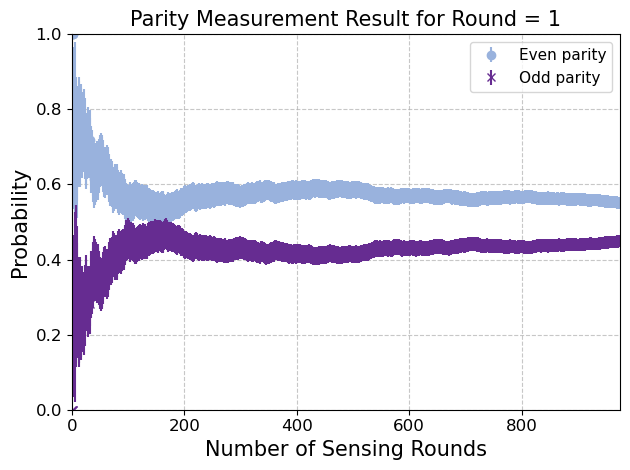

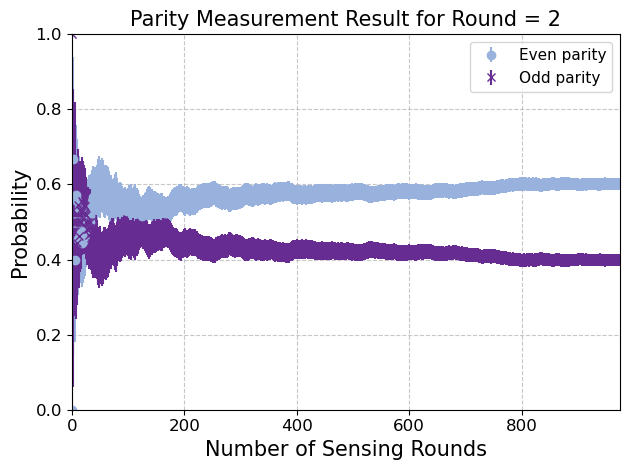

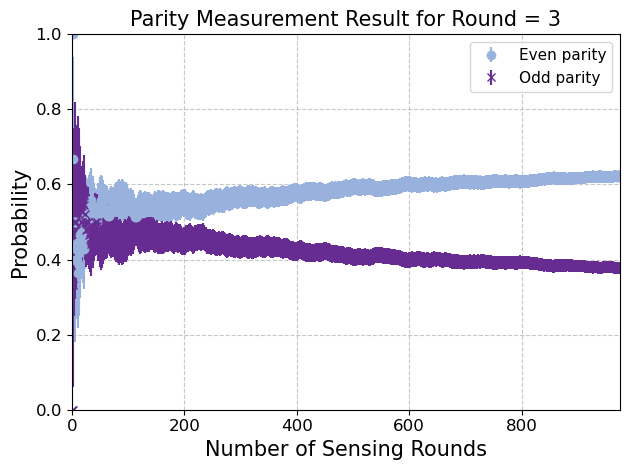

In [206]:
colors = ["#99B2DD","#662C91","#40376E","#E0BE36"]
for index, file in enumerate(filenames_Plus):
    plt.errorbar(samples_evolution, p_pass[index], p_pass_error[index], color=colors[0], fmt='o', label = "Even parity")
    plt.errorbar(samples_evolution, p_fail[index], p_fail_error[index], color=colors[1], fmt='x', label = "Odd parity")
    plt.xlabel("Number of Sensing Rounds", fontsize=15)
    plt.ylabel("Probability", fontsize=15)
    plt.title(f"Parity Measurement Result for Round = {index+1}", fontsize=15)
    plt.ylim(0,1)
    plt.xlim(0,975)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(fontsize=11, markerscale=1.)
    plt.tight_layout()
    # plt.savefig(rf"C:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Data\FOR PUBLICATION\Private_QPE_paper\Plus\with_Certification\Parity_Measurement_Graph\short_sensing_p_evol_r={index+1}")
    plt.show()

In [218]:
"""
ESTIMATION OF THETA: WITH THE VISIBILITY AND DENSITY MATRIX METHODS
IT SAVES ALL THE RELEVANT PARAMS IN thetas_mle DICTIONARY
"""
mle = {}
thetas_mle = {
              "dm": {"sum": {"values": np.zeros(3), "variance": np.zeros(3), "fisher_info": np.zeros(3)},
                    "indiv": {"values": np.zeros((4,3)), "variance": np.zeros((4,3)), "fisher_info": np.zeros((4,3))}}}

#### Function to write params in the dictionary
def set_estimation_params(estimator_class, dic, index, a_vectors_list):
    mle = estimator_class
    lim = None
    estimation_results = mle.get_theta(get_cov = True,set_lim=lim).x

    dic["sum"]["values"][index] = np.array(np.sum(estimation_results))
    dic["sum"]["variance"][index] = np.array(mle.get_variance(np.array([1, 1, 1, 1])))
    dic["sum"]["fisher_info"][index] = np.array(mle.fisher_bound/n_rounds)
    for i in range(4):
        dic["indiv"]["values"][i][index] = (estimation_results[i])
        dic["indiv"]["variance"][i][index] = np.array(mle.get_variance(a_vectors_list[i]))
        dic["indiv"]["fisher_info"][i][index] = np.array(mle.fisher_bound/n_rounds)
    return dic

### Vector list to extract the estimation of the indifivual params
a_vectors_list = [np.array([1, 0, 0, 0]), np.array([0, 1, 0, 0]), np.array([0, 0, 1, 0]), np.array([0, 0, 0, 1])]

dm_files = [i for i in glob.glob(r"C:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Data\FOR PUBLICATION\Private_QPE_paper\GHZ\QST\long_QPE_no_Certification\Run*")]
dm_folder = [i for i in glob.glob(r"C:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Data\FOR PUBLICATION\Private_QPE_paper\Plus\QST\LONG\Run*")]


density_matrix_GHZ = {}
density_matrix_Plus= {}

QST_file_GHZ = []
QST_file_Plus = []

for index, file in enumerate(filenames_Plus):
    os.chdir(dm_files[index])
    QST_file_GHZ.append(glob.glob("QST_*")[0])
    os.chdir(f'{dm_files[index]}\\{QST_file_GHZ[index]}')
    with open('density.npy','rb') as f:
        density_matrix_GHZ[f'{QST_file_GHZ[index]}'] = np.load(f)

for index, file in enumerate(dm_folder):
    os.chdir(file)
    QST_file_Plus.append(glob.glob("QST_*")[0])

for index, file in enumerate(dm_folder):
    os.chdir(f'{file}\\{QST_file_Plus[index]}')
    with open('density_TOP.npy','rb') as f:
        density_matrix_top = np.load(f)
    with open('density_BOTTOM.npy','rb') as g:
        density_matrix_bot = np.load(g)
    
    density_matrix_Plus[str(QST_file_Plus[index])] = np.array(np.outer(density_matrix_top, np.conjugate(density_matrix_bot)))


def generate_angles_in_radians(n):

    x = []
    """
    Génère 4 angles aléatoires en radians, chacun étant compris entre 0 et π/2,
    et dont la somme est exactement égale à π/2.
    """
    for i in range(n):
        """
        Génère 4 angles aléatoires en radians, chacun étant compris entre 0 et π/2,
        et dont la somme est exactement égale à π/2.
        """
        target_sum = np.pi / 2  # Somme cible
        angles = np.sort(np.random.uniform(-np.pi/2, target_sum, 3))  # Générer 3 points de coupure aléatoires
        
        # Calculer les 4 angles en prenant les différences successives
        a1 = angles[0]
        a2 = angles[1] - angles[0]
        a3 = angles[2] - angles[1]
        a4 = target_sum - angles[2]  # Assurer que la somme soit bien égale à π/2
        x.append([a1, a2, a3, a4])
    return x

# Exemple d'exécution
fisher_info_matrix_GHZ = []
x0 = generate_angles_in_radians(100)
for index, file in enumerate(filenames_Plus):
    qubit = 4
    dm_GHZ = density_matrix_GHZ[QST_file_GHZ[index]]
    dm_Plus = density_matrix_Plus[QST_file_Plus[index]]
    meas_stats = stats_list[index]
    bnds = ((-np.pi/2,np.pi/2),(-np.pi/2,np.pi/2),(-np.pi/2,np.pi/2),(-np.pi/2,np.pi/2))
    ##### Theta estimation and saving params in dictionary #####
    mle[file] = qpe.Estimator(input_state, qubit, meas_stats, x0,bnds, "attack", (dm_GHZ,dm_Plus,nu[index]))
    set_estimation_params(mle[file], thetas_mle["dm"], index, a_vectors_list)
    fisher_info_matrix_GHZ.append(mle[file].get_cov_matrix())


c:\Users\QILIP6\anaconda3\Lib\site-packages\scipy\optimize\_slsqp_py.py:437: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  fx = wrapped_fun(x)
c:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Analysis_code\QuantumPhaseEstimation\Laura_test\phase_estimation_functions.py:197: RuntimeWarning: invalid value encountered in log
  prob_distribution -= np.log(np.real(outcome@meas_dm@outcome))
c:\Users\QILIP6\anaconda3\Lib\site-packages\scipy\optimize\_slsqp_py.py:437: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  fx = wrapped_fun(x)
c:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Analysis_code\QuantumPhaseEstimation\Laura_test\phase_estimation_functions.py:197: RuntimeWarning: invalid value encountered in log
  prob_distribution -= np.log(np.real(outcome@meas_dm@outcome))
c:\Users\QILIP6\anaconda3\Lib\site-packages\scipy\optimize\_slsqp_py.py:437: RuntimeWarning: Values in x w

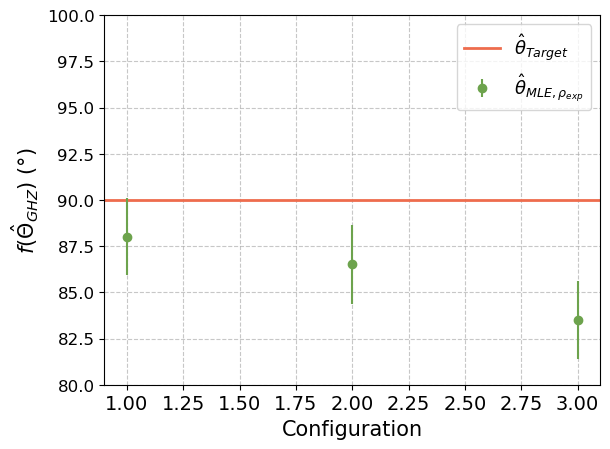

In [397]:
colors = ["#EE6C4D", "#5603AD", "#6DA34D", "#81171B", "#F19C79", "#2274A5"]
x_data = [1, 2, 3]

plt.figure(figsize=(6.4, 4.8))
plt.axhline(np.pi/2*180/np.pi, color=colors[0], linestyle='-', label=r"$\hat{\theta}_{Target}$", linewidth=2)
plt.errorbar(x_data, thetas_mle["dm"]["sum"]["values"]*180/np.pi, thetas_mle["dm"]["sum"]["variance"]*180/np.pi, color=colors[2], label = r"$\hat{\theta}_{MLE, \rho_{exp}}$", marker = 'o', linestyle = "")

plt.xlabel("Configuration", fontsize=15)
plt.ylabel(r"$f(\hat{\Theta}_{GHZ})$ (°)", fontsize=15)
plt.yticks(fontsize=12)
plt.xticks(fontsize=14)
plt.ylim(80, 100)
plt.legend(fontsize=13, markerscale=1.)#, loc='upper left')#, bbox_to_anchor=(1, 1))
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig(rf"C:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Data\FOR PUBLICATION\\Private_QPE_paper\attack\\long_QPE_no_Certification\Plus\Sensing_95_05.pdf")
plt.show()

In [398]:
thetas_mle["dm"]["indiv"]["values"]*180/np.pi

array([[ 18.77210705,  27.59574864,  44.39100379],
       [ 35.16157   ,  47.29067996,  23.00462854],
       [ 14.81732967,  22.52363446,  23.92952315],
       [ 19.25434018, -10.90087467,  -7.83469952]])

In [ ]:
target_angles = {'RUN_1' : [np.pi/8,np.pi/5,np.pi/16,0.3534291735288517],
                 'RUN_2' : [np.pi/6,np.pi/4,np.pi/8,-0.13089969389957457],
                 'RUN_3' : [2*np.pi/9,np.pi/7,np.pi/8,0.03116659378]}

target_sums = {"0": [(target_angles['RUN_1'][0])*180/np.pi,
                        (target_angles['RUN_2'][0])*180/np.pi,
                        (target_angles['RUN_3'][0])*180/np.pi],
                "1": [(target_angles['RUN_1'][1])*180/np.pi,
                        (target_angles['RUN_2'][1])*180/np.pi,
                        (target_angles['RUN_3'][1])*180/np.pi],
                "2": [(target_angles['RUN_1'][2])*180/np.pi,
                        (target_angles['RUN_2'][2])*180/np.pi,
                        (target_angles['RUN_3'][2])*180/np.pi],
                "3": [(target_angles['RUN_1'][3])*180/np.pi,
                        (target_angles['RUN_2'][3])*180/np.pi,
                        (target_angles['RUN_3'][3])*180/np.pi]}

ratio= []
for i in range((3)):
    for z in range(4):
        ratio.append(np.abs(((target_angles[f'RUN_{i+1}'][z])-(thetas_mle["dm"]["indiv"]["values"][z][i]))/np.pi))

np.log10(100*np.array(ratio))

SENSING GHZ + BELL

In [381]:
"""
DEFINING FOLDERS AND DIRECTORIES
"""

data_dir = [r"C:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Data\FOR PUBLICATION\Private_QPE_paper\GHZ\long_QPE_no_Certification",
            r"C:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Data\FOR PUBLICATION\Private_QPE_paper\Bell\long_QPE_no_Certification",
            r"C:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Data\FOR PUBLICATION\Private_QPE_paper\Plus\long_QPE_no_Certification"]

os.chdir(data_dir[0])
filenames_GHZ = [i for i in glob.glob("COMPLETE_*")]

os.chdir(data_dir[1])
filenames_Bell = [i for i in glob.glob("COMPLETE_*")]

os.chdir(data_dir[2])
filenames_Plus = [i for i in glob.glob("COMPLETE_*")]

input_state = ('GHZ','Bell','Plus')
n_qubits = 4


In [406]:
from datetime import datetime
"""
CALCULATING THE STATISTICS OBTAINED FROM THE XXXX MEASUREMENTS
"""
#Ordering the files : 
order = ['FIRST', 'SECOND', 'THIRD', 'FOURTH', 'FIFTH', 'SIXTH']

# Fonction pour extraire l’ordre à partir du nom
def sort_key(item):
    for index, keyword in enumerate(order):
        if keyword in item:
            return index
    return len(order)  # En cas d'élément non reconnu, le mettre à la fin

# Tri de la liste
filenames_GHZ = sorted(filenames_GHZ, key=sort_key)

files_GHZ = []
files_Bell = []
files_Plus = []

for index, file in enumerate(filenames_GHZ):
    file_dir = f"{data_dir[0]}\{file}\counts"
    os.chdir(file_dir)
    files_GHZ.append([i for i in glob.glob("Phase*.txt")])
    ### This assumes the label is of the form: "PhaseEstimation=xxxx_{index}_{theta_4}"
    files_GHZ[index].sort(key = lambda x: int((x.split("_")[1]).split(".")[0]))

for index, file in enumerate(filenames_Bell):
    file_dir = f"{data_dir[1]}\{file}\counts"
    os.chdir(file_dir)
    files_Bell.append([i for i in glob.glob("Phase*.txt")])
    ### This assumes the label is of the form: "PhaseEstimation=xxxx_{index}_{theta_4}"
    files_Bell[index].sort(key = lambda x: int((x.split("_")[1]).split(".")[0]))

for index, file in enumerate(filenames_Plus):
    file_dir = f"{data_dir[2]}\{file}\counts"
    os.chdir(file_dir)
    files_Plus.append([i for i in glob.glob("Phase*.txt")])
    ### This assumes the label is of the form: "PhaseEstimation=xxxx_{index}_{theta_4}"
    files_Plus[index].sort(key = lambda x: int((x.split("_")[1]).split(".")[0]))


New_dir = [r'C:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Data\FOR PUBLICATION\Private_QPE_paper\Attack\long_QPE_no_Certification\Bell_Plus\RUN_1\counts',r'C:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Data\FOR PUBLICATION\Private_QPE_paper\Attack\long_QPE_no_Certification\Bell_Plus\RUN_2\counts',r'C:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Data\FOR PUBLICATION\Private_QPE_paper\Attack\long_QPE_no_Certification\Bell_Plus\RUN_3\counts']
nu = []
List_Files = []

for index in range(len(New_dir)):
    os.chdir(New_dir[index])
    files = [i for i in glob.glob("Phase*.txt")]
    for f in files: 
        os.remove(f)

for w in range(len(filenames_Plus)):
    random.seed(datetime.now().strftime('%Y%m%d%H%M%S'))
    Files = []
    nu.append(random.choices(population = [0,1,2],weights = [0.9, 0.05, 0.05],k = len(files_Plus[0][:975])))
    
    for i in range(len(nu[0])):

        if nu[w][i] == 0:

            file_dir = f"{data_dir[0]}\{filenames_GHZ[w]}\counts"
            os.chdir(file_dir)
            Files.append(files_GHZ[w][i])
            shutil.copy(f"{data_dir[0]}\{filenames_GHZ[w]}\counts\{files_GHZ[w][i]}",New_dir[w])

        if nu[w][i] == 1:
            file_dir = f"{data_dir[1]}\{filenames_Bell[w]}\counts"
            os.chdir(file_dir)
            Files.append(files_Bell[w][i])
            shutil.copy(f"{data_dir[1]}\{filenames_Bell[w]}\counts\{files_Bell[w][i]}",New_dir[w])

        if nu[w][i] == 2:
            file_dir = f"{data_dir[2]}\{filenames_Plus[w]}\counts"
            os.chdir(file_dir)
            Files.append(files_Plus[w][i])
            shutil.copy(f"{data_dir[2]}\{filenames_Plus[w]}\counts\{files_Plus[w][i]}",New_dir[w])
    
    List_Files.append(Files)

<string>:23: SyntaxWarning: invalid escape sequence '\{'
<string>:30: SyntaxWarning: invalid escape sequence '\{'
<string>:37: SyntaxWarning: invalid escape sequence '\{'
<string>:63: SyntaxWarning: invalid escape sequence '\{'
<string>:66: SyntaxWarning: invalid escape sequence '\{'
<string>:66: SyntaxWarning: invalid escape sequence '\{'
<string>:69: SyntaxWarning: invalid escape sequence '\{'
<string>:72: SyntaxWarning: invalid escape sequence '\{'
<string>:72: SyntaxWarning: invalid escape sequence '\{'
<string>:75: SyntaxWarning: invalid escape sequence '\{'
<string>:78: SyntaxWarning: invalid escape sequence '\{'
<string>:78: SyntaxWarning: invalid escape sequence '\{'
<>:23: SyntaxWarning: invalid escape sequence '\{'
<>:23: SyntaxWarning: invalid escape sequence '\c'
<>:30: SyntaxWarning: invalid escape sequence '\{'
<>:30: SyntaxWarning: invalid escape sequence '\c'
<>:37: SyntaxWarning: invalid escape sequence '\{'
<>:37: SyntaxWarning: invalid escape sequence '\c'
<>:63: Syn

In [407]:
stabilizers = ["xxxx"]
stab_sign = [1]
STABILIZER_TO_INDEX = {stab: i for i, stab in enumerate(stabilizers)}

n_rounds =975
samples_evolution = np.arange(1, n_rounds+1, 1)
stats_list = []

p_pass = np.zeros((len(filenames_Plus), n_rounds))
p_pass_error = np.zeros((len(filenames_Plus), n_rounds))

for index, file in enumerate(filenames_Plus):
    stats = cs.Operartors_Statistics(n_qubits, stabilizers, stab_sign, STABILIZER_TO_INDEX, List_Files[index], New_dir[index])#, qubit='1',state='Bell',set_loops=1) #Set_loops = 1?
    stats_list.append(stats)

    p_pass_list, n_samples_list = stats.get_pass_prob_evolution(samples_evolution)
    
    p_pass[index] = np.array(p_pass_list, dtype = float)
    p_pass_error[index] = np.array(stats.p_pass_error_list, dtype = float)

p_fail = 1 - p_pass
p_fail_error = p_pass_error

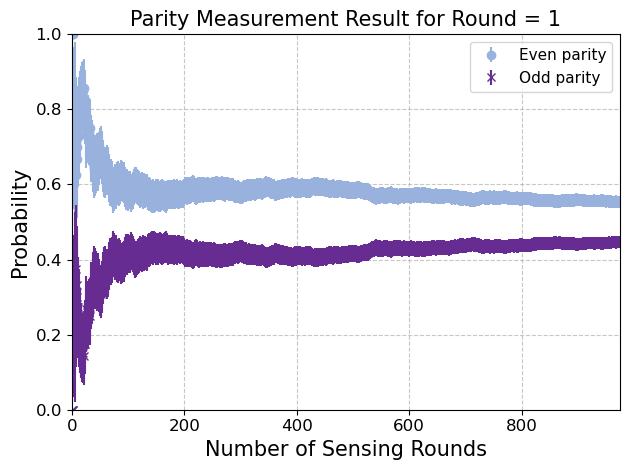

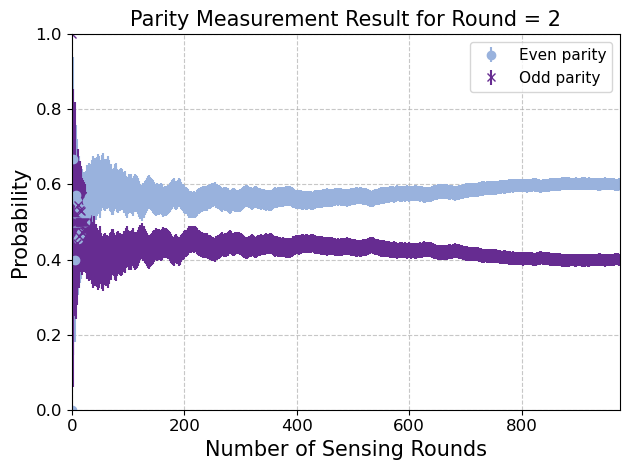

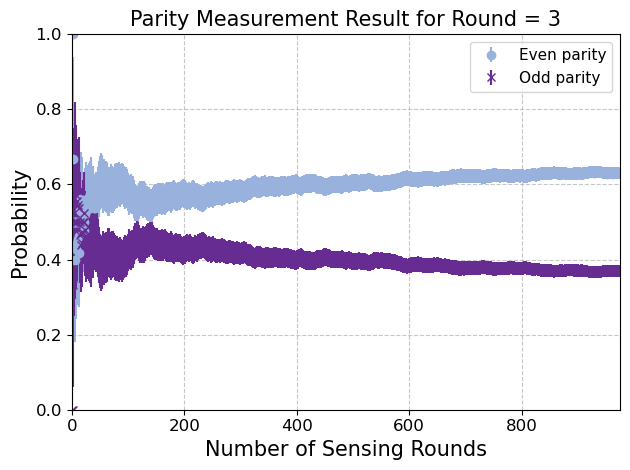

In [408]:
colors = ["#99B2DD","#662C91","#40376E","#E0BE36"]
for index, file in enumerate(filenames_Plus):
    plt.errorbar(samples_evolution, p_pass[index], p_pass_error[index], color=colors[0], fmt='o', label = "Even parity")
    plt.errorbar(samples_evolution, p_fail[index], p_fail_error[index], color=colors[1], fmt='x', label = "Odd parity")
    plt.xlabel("Number of Sensing Rounds", fontsize=15)
    plt.ylabel("Probability", fontsize=15)
    plt.title(f"Parity Measurement Result for Round = {index+1}", fontsize=15)
    plt.ylim(0,1)
    plt.xlim(0,975)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(fontsize=11, markerscale=1.)
    plt.tight_layout()
    # plt.savefig(rf"C:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Data\FOR PUBLICATION\Private_QPE_paper\Plus\with_Certification\Parity_Measurement_Graph\short_sensing_p_evol_r={index+1}")
    plt.show()

In [ ]:
"""
ESTIMATION OF THETA: WITH THE VISIBILITY AND DENSITY MATRIX METHODS
IT SAVES ALL THE RELEVANT PARAMS IN thetas_mle DICTIONARY
"""
mle = {}
thetas_mle = {
              "dm": {"sum": {"values": np.zeros(3), "variance": np.zeros(3), "fisher_info": np.zeros(3)},
                    "indiv": {"values": np.zeros((4,3)), "variance": np.zeros((4,3)), "fisher_info": np.zeros((4,3))}}}

#### Function to write params in the dictionary
def set_estimation_params(estimator_class, dic, index, a_vectors_list):
    mle = estimator_class
    lim = 975
    estimation_results = mle.get_theta(get_cov = True,set_lim=lim).x

    dic["sum"]["values"][index] = np.array(np.sum(estimation_results))
    dic["sum"]["variance"][index] = np.array(mle.get_variance(np.array([1, 1, 1, 1])))
    dic["sum"]["fisher_info"][index] = np.array(mle.fisher_bound/lim)
    for i in range(4):
        dic["indiv"]["values"][i][index] = (estimation_results[i])
        dic["indiv"]["variance"][i][index] = np.array(mle.get_variance(a_vectors_list[i]))
        dic["indiv"]["fisher_info"][i][index] = np.array(mle.fisher_bound/lim)
    return dic

### Vector list to extract the estimation of the indifivual params
a_vectors_list = [np.array([1, 0, 0, 0]), np.array([0, 1, 0, 0]), np.array([0, 0, 1, 0]), np.array([0, 0, 0, 1])]

dm_folder_GHZ = [i for i in glob.glob(r"C:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Data\FOR PUBLICATION\Private_QPE_paper\GHZ\QST\long_QPE_no_Certification\Run*")]
dm_folder_Bell = [i for i in glob.glob(r"C:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Data\FOR PUBLICATION\Private_QPE_paper\Bell\QST\long_QPE_no_Certification\Run*")]
dm_folder_Plus = [i for i in glob.glob(r"C:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Data\FOR PUBLICATION\Private_QPE_paper\Plus\QST\LONG\Run*")]

density_matrix_GHZ = {}
density_matrix_Bell= {}
density_matrix_Plus= {}

QST_file_GHZ = []
QST_file_Bell = []
QST_file_Plus = []

for index, file in enumerate(filenames_Plus):
    os.chdir(dm_folder_GHZ[index])
    QST_file_GHZ.append(glob.glob("QST_*")[0])
    os.chdir(f'{dm_folder_GHZ[index]}\\{QST_file_GHZ[index]}')
    with open('density.npy','rb') as f:
        density_matrix_GHZ[f'{QST_file_GHZ[index]}'] = np.load(f)

for index, file in enumerate(dm_folder_Bell):
    os.chdir(file)
    QST_file_Bell.append(glob.glob("QST_*")[0])

for index, file in enumerate(dm_folder_Bell):
    os.chdir(f'{file}\\{QST_file_Bell[index]}')
    with open('density_TOP.npy','rb') as f:
        density_matrix_top = np.load(f)
    with open('density_BOTTOM.npy','rb') as g:
        density_matrix_bot = np.load(g)
    
    density_matrix_Bell[str(QST_file_Bell[index])] = np.kron(density_matrix_top,density_matrix_bot)

for index, file in enumerate(dm_folder_Plus):
    os.chdir(file)
    QST_file_Plus.append(glob.glob("QST_*")[0])

for index, file in enumerate(dm_folder_Plus):
    os.chdir(f'{file}\\{QST_file_Plus[index]}')
    with open('density_TOP.npy','rb') as f:
        density_matrix_top = np.load(f)
    with open('density_BOTTOM.npy','rb') as g:
        density_matrix_bot = np.load(g)
    
    density_matrix_Plus[str(QST_file_Plus[index])] = np.array(np.outer(density_matrix_top, np.conjugate(density_matrix_bot)))



def generate_angles_in_radians(n):

    x = []
    """
    Génère 4 angles aléatoires en radians, chacun étant compris entre 0 et π/2,
    et dont la somme est exactement égale à π/2.
    """
    for i in range(n):
        """
        Génère 4 angles aléatoires en radians, chacun étant compris entre 0 et π/2,
        et dont la somme est exactement égale à π/2.
        """
        target_sum = np.pi / 2  # Somme cible
        angles = np.sort(np.random.uniform(-np.pi/2, target_sum, 3))  # Générer 3 points de coupure aléatoires
        
        # Calculer les 4 angles en prenant les différences successives
        a1 = angles[0]
        a2 = angles[1] - angles[0]
        a3 = angles[2] - angles[1]
        a4 = target_sum - angles[2]  # Assurer que la somme soit bien égale à π/2
        x.append([a1, a2, a3, a4])
    return x

# Exemple d'exécution
fisher_info_matrix_GHZ = []
x0 = generate_angles_in_radians(100)
for index, file in enumerate(filenames_Plus):
    qubit = 4
    dm_GHZ = density_matrix_GHZ[QST_file_GHZ[index]]
    dm_Bell = density_matrix_Bell[QST_file_Bell[index]]
    dm_Plus = density_matrix_Plus[QST_file_Plus[index]]
    meas_stats = stats_list[index]
    bnds = ((-np.pi/2,np.pi/2),(-np.pi/2,np.pi/2),(-np.pi/2,np.pi/2),(-np.pi/2,np.pi/2))
    ##### Theta estimation and saving params in dictionary #####
    mle[file] = qpe.Estimator(input_state, qubit, meas_stats, x0,bnds, "attack_2_states", (dm_GHZ,dm_Bell,dm_Plus,nu[index]))
    set_estimation_params(mle[file], thetas_mle["dm"], index, a_vectors_list)
    fisher_info_matrix_GHZ.append(mle[file].get_cov_matrix())


c:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Analysis_code\QuantumPhaseEstimation\Laura_test\phase_estimation_functions.py:228: RuntimeWarning: invalid value encountered in log
  prob_distribution -= np.log(np.real(outcome@meas_dm@outcome))
c:\Users\QILIP6\anaconda3\Lib\site-packages\scipy\optimize\_slsqp_py.py:437: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  fx = wrapped_fun(x)
c:\Users\QILIP6\anaconda3\Lib\site-packages\scipy\optimize\_slsqp_py.py:437: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  fx = wrapped_fun(x)
c:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Analysis_code\QuantumPhaseEstimation\Laura_test\phase_estimation_functions.py:228: RuntimeWarning: invalid value encountered in log
  prob_distribution -= np.log(np.real(outcome@meas_dm@outcome))
c:\Users\QILIP6\anaconda3\Lib\site-packages\scipy\optimize\_slsqp_py.py:437: RuntimeWarning: Values in x w

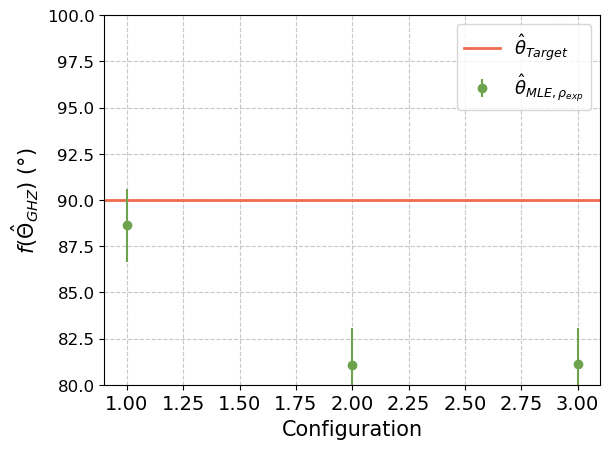

In [405]:
colors = ["#EE6C4D", "#5603AD", "#6DA34D", "#81171B", "#F19C79", "#2274A5"]
x_data = [1, 2, 3]

plt.figure(figsize=(6.4, 4.8))
plt.axhline(np.pi/2*180/np.pi, color=colors[0], linestyle='-', label=r"$\hat{\theta}_{Target}$", linewidth=2)
plt.errorbar(x_data, thetas_mle["dm"]["sum"]["values"]*180/np.pi, thetas_mle["dm"]["sum"]["variance"]*180/np.pi, color=colors[2], label = r"$\hat{\theta}_{MLE, \rho_{exp}}$", marker = 'o', linestyle = "")

plt.xlabel("Configuration", fontsize=15)
plt.ylabel(r"$f(\hat{\Theta}_{GHZ})$ (°)", fontsize=15)
plt.yticks(fontsize=12)
plt.xticks(fontsize=14)
plt.ylim(80, 100)
plt.legend(fontsize=13, markerscale=1.)#, loc='upper left')#, bbox_to_anchor=(1, 1))
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig(rf"C:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Data\FOR PUBLICATION\\Private_QPE_paper\attack\\long_QPE_no_Certification\Plus\Sensing_95_05.pdf")
plt.show()

In [394]:
thetas_mle["dm"]["indiv"]["values"]*180/np.pi

array([[ 18.77210705,  27.59574864,  44.39100379],
       [ 35.16157   ,  47.29067996,  23.00462854],
       [ 14.81732967,  22.52363446,  23.92952315],
       [ 19.25434018, -10.90087467,  -7.83469952]])

In [395]:
print(thetas_mle["dm"]["indiv"]["values"][0]*180/np.pi + thetas_mle["dm"]["indiv"]["values"][1]*180/np.pi)
print(thetas_mle["dm"]["indiv"]["values"][2]*180/np.pi + thetas_mle["dm"]["indiv"]["values"][3]*180/np.pi)


[53.93367705 74.8864286  67.39563233]
[34.07166986 11.62275978 16.09482363]


In [393]:
target_angles = {'RUN_1' : [np.pi/8,np.pi/5,np.pi/16,0.3534291735288517],
                 'RUN_2' : [np.pi/6,np.pi/4,np.pi/8,-0.13089969389957457],
                 'RUN_3' : [2*np.pi/9,np.pi/7,np.pi/8,0.03116659378]}

target_sums = {"0": [(target_angles['RUN_1'][0])*180/np.pi,
                        (target_angles['RUN_2'][0])*180/np.pi,
                        (target_angles['RUN_3'][0])*180/np.pi],
                "1": [(target_angles['RUN_1'][1])*180/np.pi,
                        (target_angles['RUN_2'][1])*180/np.pi,
                        (target_angles['RUN_3'][1])*180/np.pi],
                "2": [(target_angles['RUN_1'][2])*180/np.pi,
                        (target_angles['RUN_2'][2])*180/np.pi,
                        (target_angles['RUN_3'][2])*180/np.pi],
                "3": [(target_angles['RUN_1'][3])*180/np.pi,
                        (target_angles['RUN_2'][3])*180/np.pi,
                        (target_angles['RUN_3'][3])*180/np.pi]}

ratio_indiv= []
for i in range((3)):
    for z in range(4):
        ratio_indiv.append(np.abs(((target_angles[f'RUN_{i+1}'][z])-(thetas_mle["dm"]["indiv"]["values"][z][i]))/np.pi))

ratio_sum= []
for i in range(len(theta_1)):
    ratio_sum.append(np.abs((target_angles[f'RUN_{i+1}'][0]+target_angles[f'RUN_{i+1}'][1])-(thetas_mle["dm"]["indiv"]["values"][0][i] + thetas_mle["dm"]["indiv"]["values"][1][i]))/np.pi)
    ratio_sum.append(np.abs((target_angles[f'RUN_{i+1}'][2]+target_angles[f'RUN_{i+1}'][3])-(thetas_mle["dm"]["indiv"]["values"][2][i] + thetas_mle["dm"]["indiv"]["values"][3][i]))/np.pi)



print(np.log10(100*np.array(ratio_indiv)))
print(np.log10(100*np.array(ratio_sum)))



[ 0.31619093 -0.33180569  0.29707074 -0.25716153  0.12570737  0.10469191
 -1.88172689  0.27631812  0.38729131  0.17764184 -0.10008131  0.72792125]
[ 0.40429412  0.15494271 -1.20000352  0.27328945 -0.02961525  0.65805862]
